<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.161391  20.107838  53.465515  ...  144.762277  145.566703 -0.804425
      1.0    50.577977  70.357052  78.547844  ...  208.282753  210.673587 -2.390834
      2.0    85.677446  89.104845  34.957909  ...  209.795249  218.067515 -8.272266
      3.0    47.557066  80.660508  86.242170  ...  229.928140  225.881144  4.046996
      4.0    44.732970  83.639019  77.615088  ...  214.295769  216.738216 -2.442447
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   51.606352  91.424471  43.005834  ...  193.441860  198.901712 -5.459853
      16.0   79.469739  53.641282  31.802815  ...  170.205924  174.929511 -4.723586
      17.0   70.768106  45.646102  39.905873  ...  175.590438  165.724586  9.865852
      18.0   85.841967  79.059314  73.519002  ...  253.379319  249.236765  4.142554
      19.0   73.394114  99.572871  83.405053  ...  272.732270  268.613054  4.119216

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.161391  20.107838  53.465515  ...  144.762277  145.566703 -0.804425
      1.0    50.577977  70.357052  78.547844  ...  208.282753  210.673587 -2.390834
      2.0    85.677446  89.104845  34.957909  ...  209.795249  218.067515 -8.272266
      3.0    47.557066  80.660508  86.242170  ...  229.928140  225.881144  4.046996
      4.0    44.732970  83.639019  77.615088  ...  214.295769  216.738216 -2.442447
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   51.606352  91.424471  43.005834  ...  193.441860  198.901712 -5.459853
      16.0   79.469739  53.641282  31.802815  ...  170.205924  174.929511 -4.723586
      17.0   70.768106  45.646102  39.905873  ...  175.590438  165.724586  9.865852
      18.0   85.841967  79.059314  73.519002  ...  253.379319  249.236765  4.142554
      19.0   73.394114  99.572871  83.405053  ...  272.732270  268.613054  4.119216

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    61.161391  20.107838  53.465515  ...  144.762277  145.566703 -0.804425
      1.0    50.577977  70.357052  78.547844  ...  208.282753  210.673587 -2.390834
      2.0    85.677446  89.104845  34.957909  ...  209.795249  218.067515 -8.272266
      3.0    47.557066  80.660508  86.242170  ...  229.928140  225.881144  4.046996
      4.0    44.732970  83.639019  77.615088  ...  214.295769  216.738216 -2.442447
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   51.606352  91.424471  43.005834  ...  193.441860  198.901712 -5.459853
      16.0   79.469739  53.641282  31.802815  ...  170.205924  174.929511 -4.723586
      17.0   70.768106  45.646102  39.905873  ...  175.590438  165.724586  9.865852
      18.0   85.841967  79.059314  73.519002  ...  253.379319  249.236765  4.142554
      19.0   73.394114  99.572871  83.405053  ...  272.732270  268.613054  4.119216

[20000 rows x 7 columns]

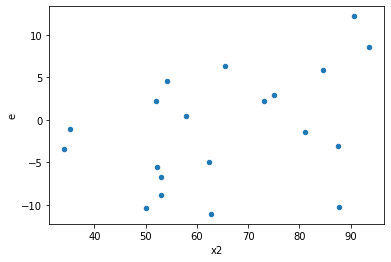

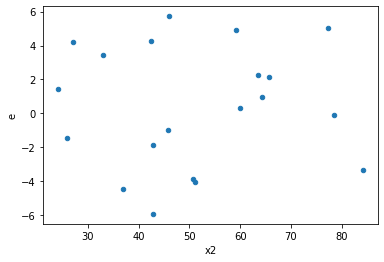

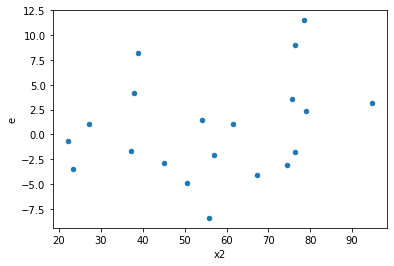

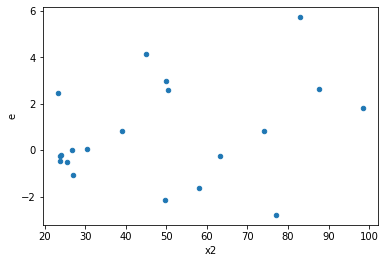

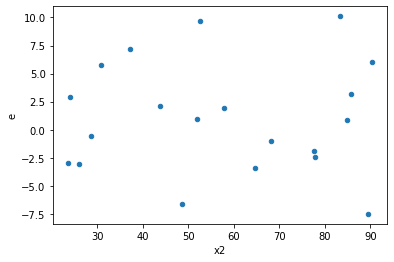

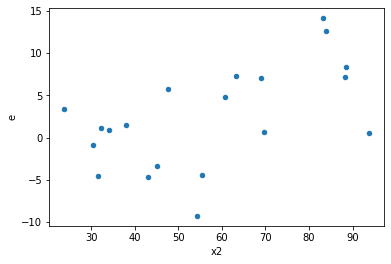

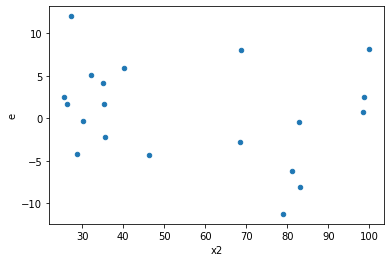

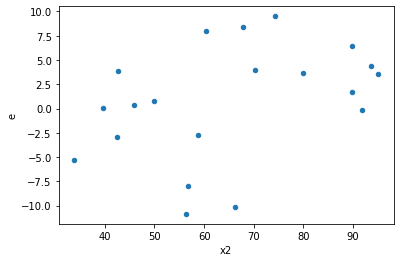

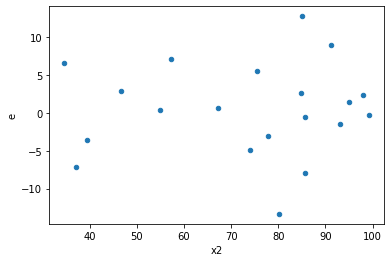

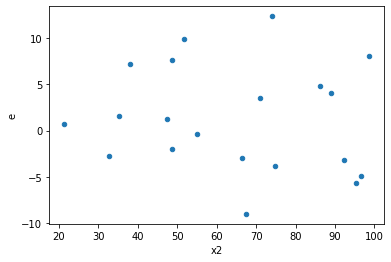

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,123.1966295390477,307.61595936504017,24.639325907809543,61.52319187300803,2.4969510977371336,0.3379923776647098,0.8310038111676451,0.1689961888323549,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,41.242796182013414,151.27800334600497,8.248559236402683,30.255600669200994,3.66798610546148,0.18008834619967917,0.9099558269001604,0.09004417309983959,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,25.244856656529997,143.9794113769405,5.048971331305999,28.795882275388102,5.703316653204203,0.07890594823632102,0.9605470258818395,0.03945297411816051,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,166.69356330557872,190.09403959820835,33.33871266111574,38.018807919641674,1.1403802032219592,0.8888960972534132,0.5555519513732934,0.4444480486267066,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,12.159115445363872,80.46913104685947,2.4318230890727746,16.093826209371894,6.618008637917933,0.05853860883313744,0.9707306955834313,0.02926930441656872,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,51.74277223441419,89.88576777469676,10.348554446882838,17.977153554939353,1.7371656734486602,0.5591920151329657,0.7204039924335172,0.27959600756648284,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,28.866103410900525,110.40577888235936,5.773220682180105,22.08115577647187,3.824755191608838,0.16726273742707187,0.9163686312864641,0.08363136871353594,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,81.66928025690363,308.76790652861524,16.333856051380728,61.753581305723046,3.780710513884008,0.17073475963970597,0.914632620180147,0.08536737981985298,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,100.32797040465097,122.67841690271393,20.065594080930193,24.535683380542785,1.222773832739936,0.8307087995210845,0.5846456002394578,0.4153543997605422,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,123.1966295390477,307.61595936504017,24.639325907809543,61.52319187300803,2.4969510977371336,0.3379923776647098,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,41.242796182013414,151.27800334600497,8.248559236402683,30.255600669200994,3.66798610546148,0.18008834619967917,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,25.244856656529997,143.9794113769405,5.048971331305999,28.795882275388102,5.703316653204203,0.07890594823632102,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,97.8863756055643,90.87464981937848,19.57727512111286,18.174929963875694,0.9283687260580599,0.9369824110060886,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,166.69356330557872,190.09403959820835,33.33871266111574,38.018807919641674,1.1403802032219592,0.8888960972534132,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,12.159115445363872,80.46913104685947,2.4318230890727746,16.093826209371894,6.618008637917933,0.05853860883313744,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,90.44768948365885,35.26051973310733,18.08953789673177,7.052103946621466,0.3898443391356928,0.3244060326304175,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,51.74277223441419,89.88576777469676,10.348554446882838,17.977153554939353,1.7371656734486602,0.5591920151329657,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,28.866103410900525,110.40577888235936,5.773220682180105,22.08115577647187,3.824755191608838,0.16726273742707187,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      864
Reject005=0 : Heteroscedasticity    136
Name: Result_test, dtype: int64